In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import math

In [3]:
K = 10

In [31]:
phi_df = pd.read_csv("BC2it2000-phi.tsv", delimiter='\t',)
del phi_df['Unnamed: 0']

## Getting figures showing top genes associated to each factor

In [5]:
def clean_ax(ax,
            spines = ["right","top"],
            ):
    for sp in spines:
        ax.spines[sp].set_visible(False)

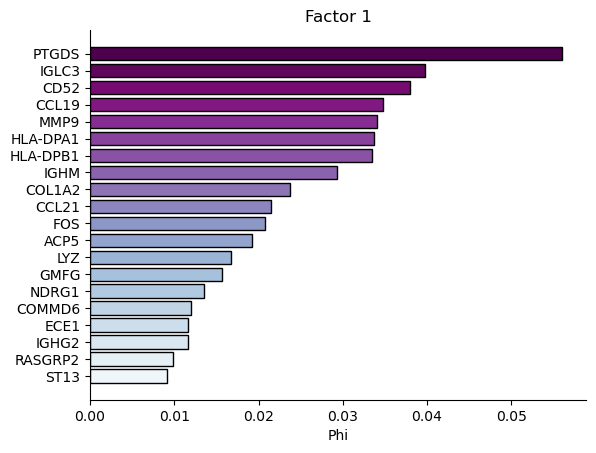

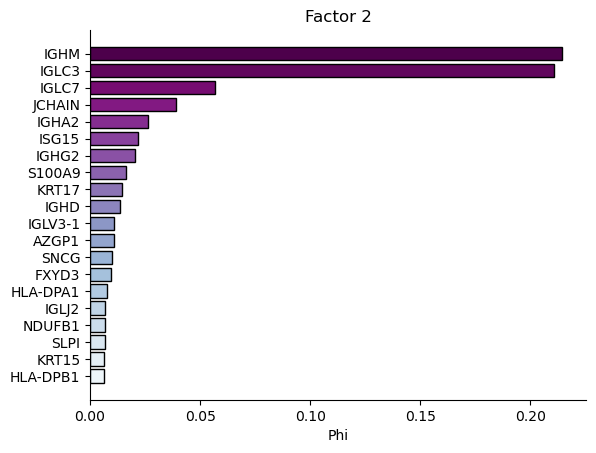

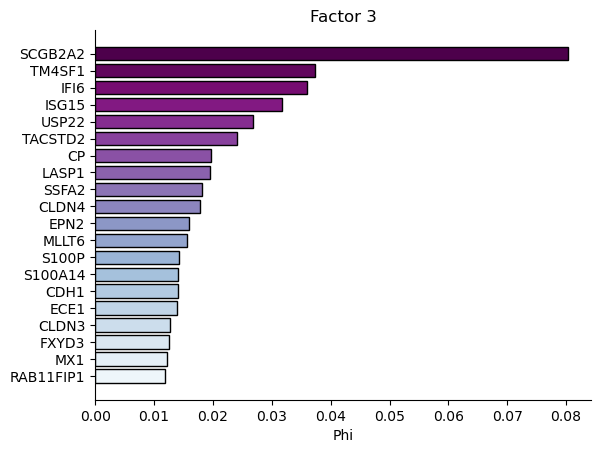

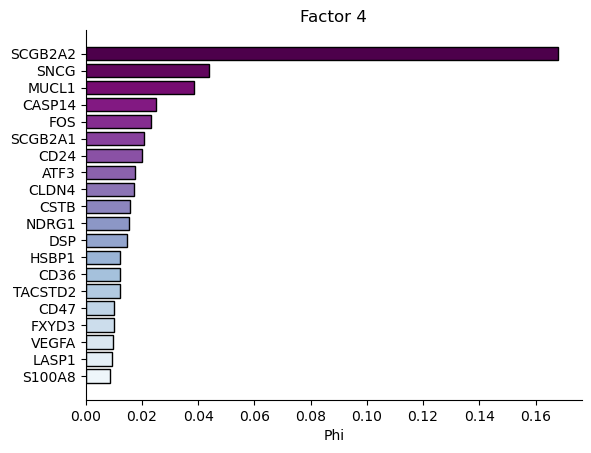

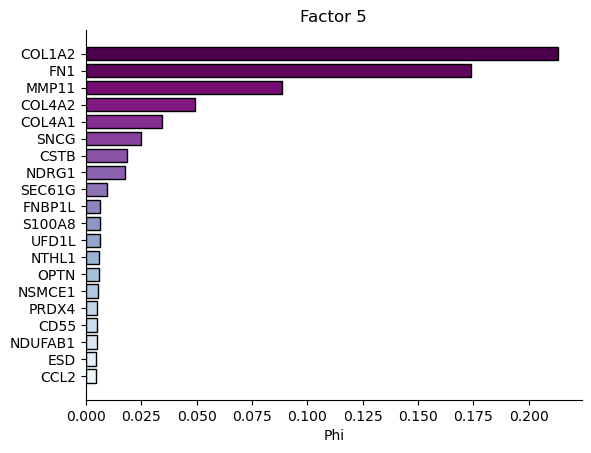

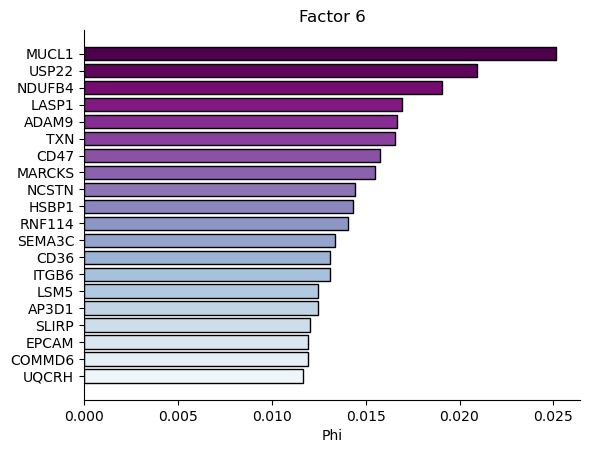

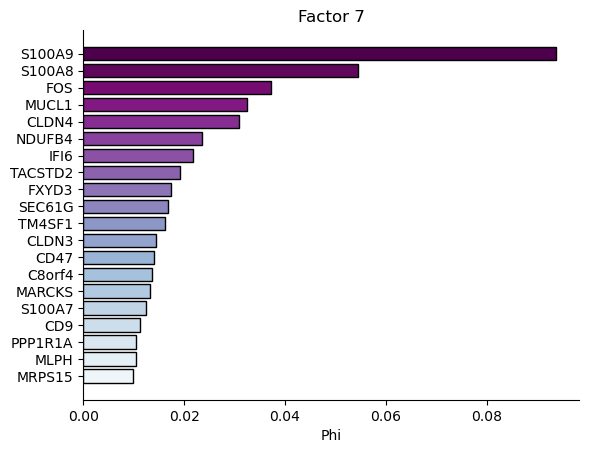

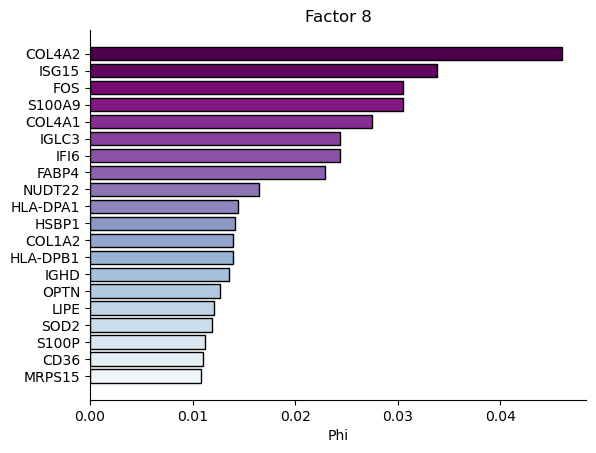

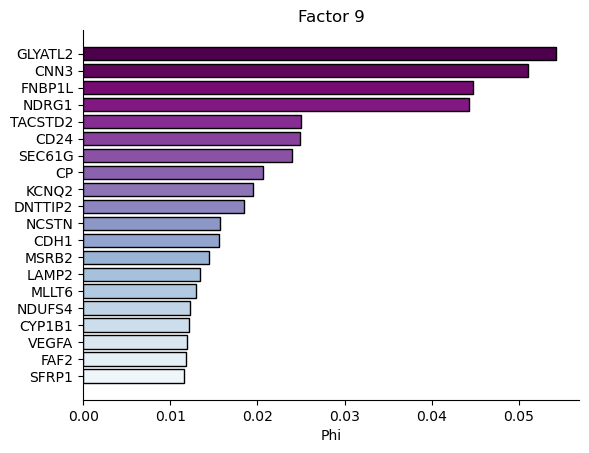

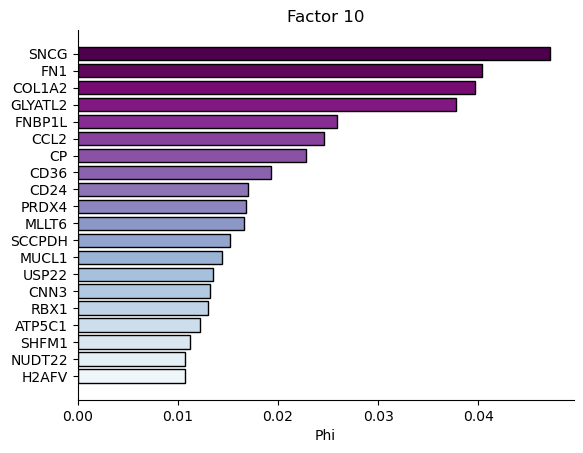

In [32]:
n_genes = 20
#cmap = lambda c: plt.cm.GnBu_r(c /n_genes)
cmap = lambda c: plt.cm.BuPu_r(c /n_genes)

for factor in range(10):
    ordr = np.argsort(phi_df.loc[factor, :].values)[::-1]
    genes = phi_df.columns[ordr]
    ord_phi_df = phi_df.iloc[:,ordr]
    plt.rcdefaults()
    fig, ax = plt.subplots()

    top_genes = genes[0:n_genes]
    y_pos = np.arange(len(top_genes))
    phi_value = ord_phi_df.loc[factor][0:n_genes]
    bars =ax.barh(y_pos, phi_value, align='center',edgecolor = "black")
    
    for k,b in enumerate(bars):
        b.set_color(cmap(k))
        b.set_edgecolor("black")

    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_genes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Phi')
    ax.set_title('Factor {}'.format(factor+1))
    clean_ax(ax)

    plt.savefig("/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/Figures/Fig4/B_TopGenes_factor{}.png".format(factor+1))

## GO pathway enrichment analysis

In [33]:
from gprofiler import GProfiler
gp = GProfiler(
    return_dataframe=True, #return pandas dataframe or plain python structures    
)

gp_list = []

for topic in range(10):
    
    ordr = np.argsort(phi_df.loc[topic, :].values)[::-1]
    genes = phi_df.columns[ordr]
    ord_phi_df = phi_df.iloc[:,ordr]
    top_genes = genes[0:50]
    
    tmp = gp.profile(organism='hsapiens',
            query=top_genes.tolist())
    
    keep = tmp.source.values == "GO:BP"
    tmp = tmp.iloc[keep,:]
    
    gp_list.append(tmp)

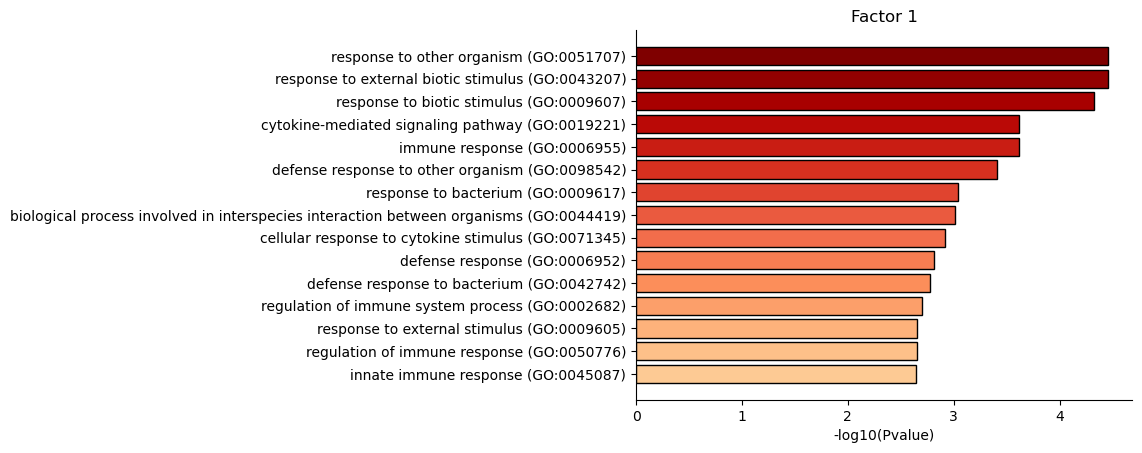

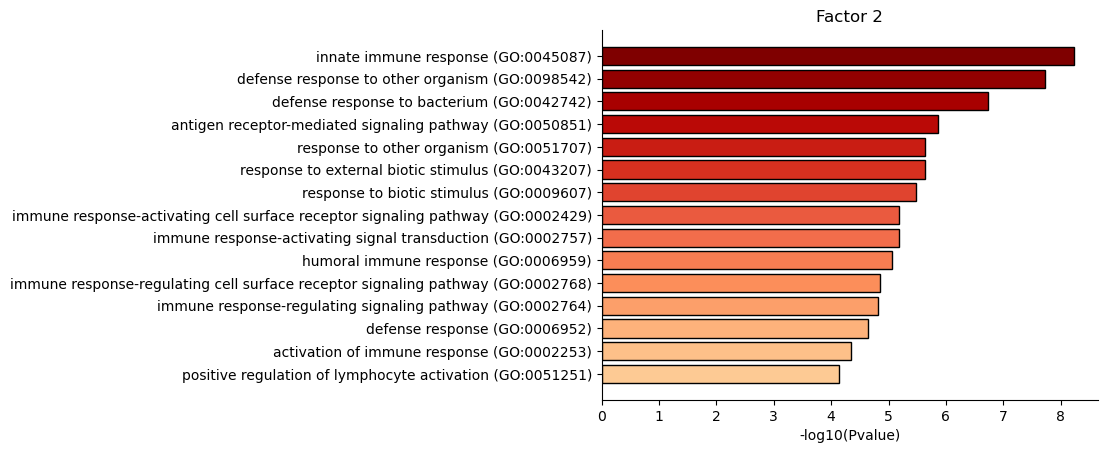

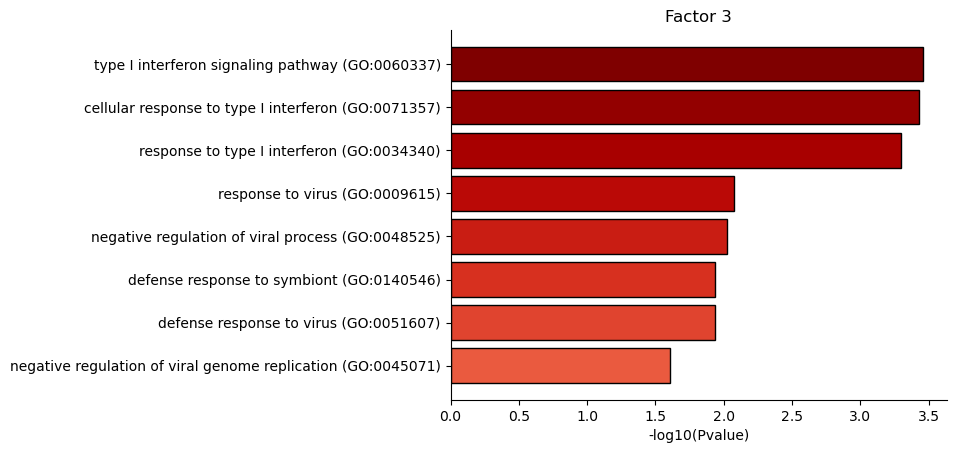

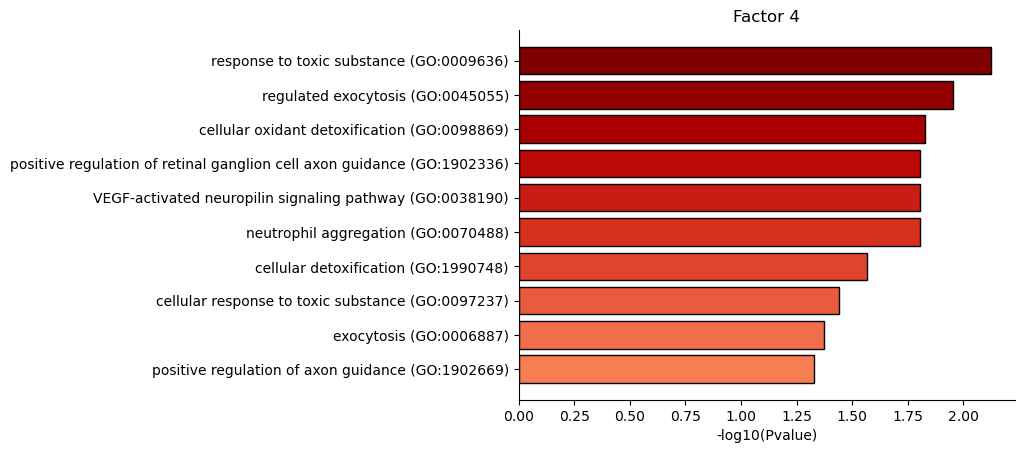

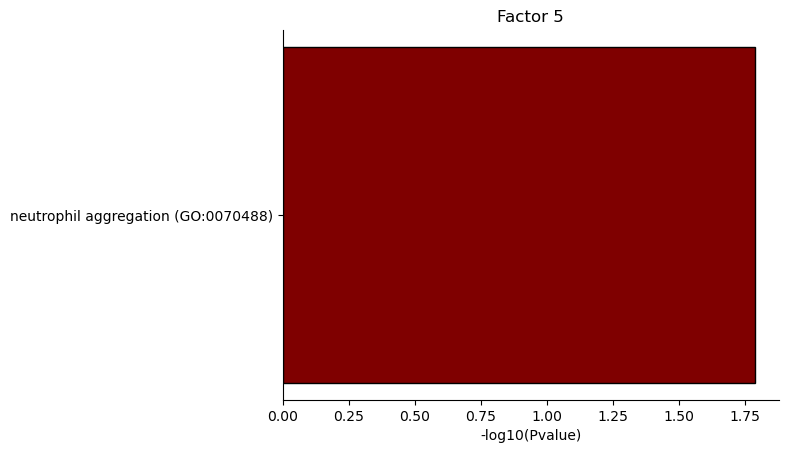

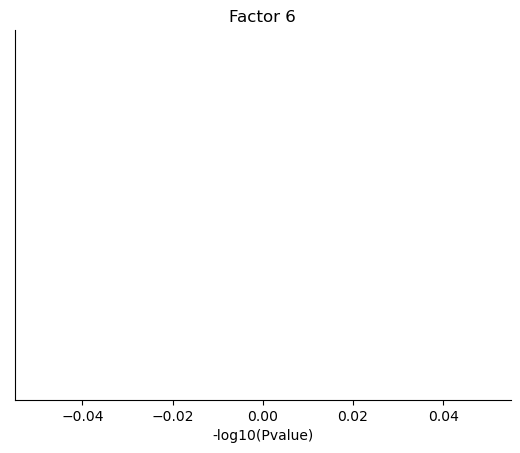

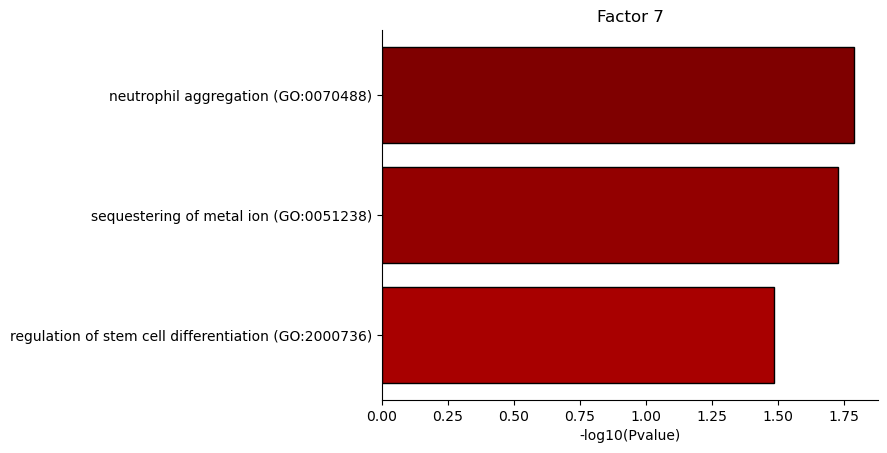

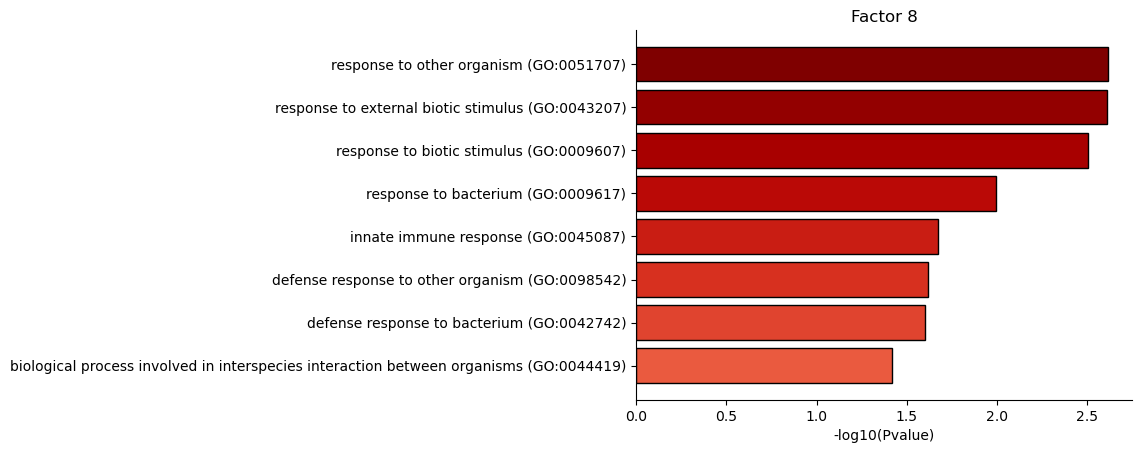

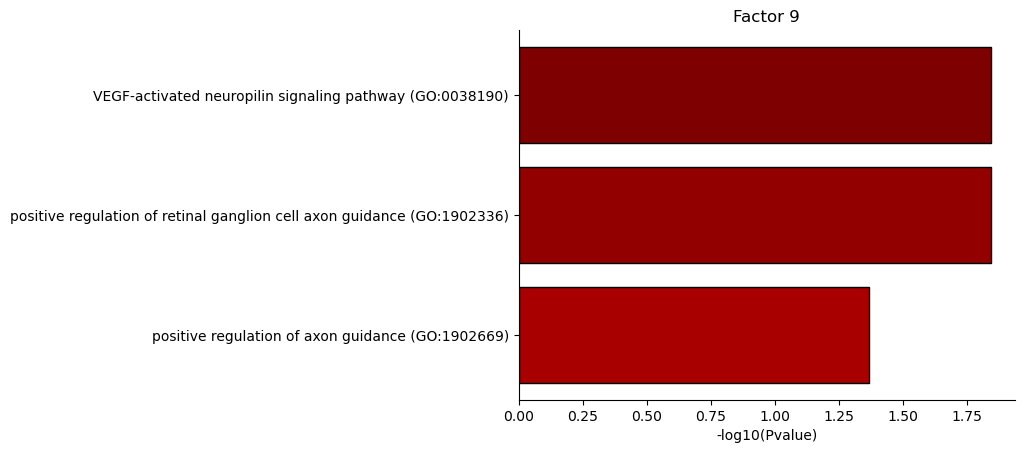

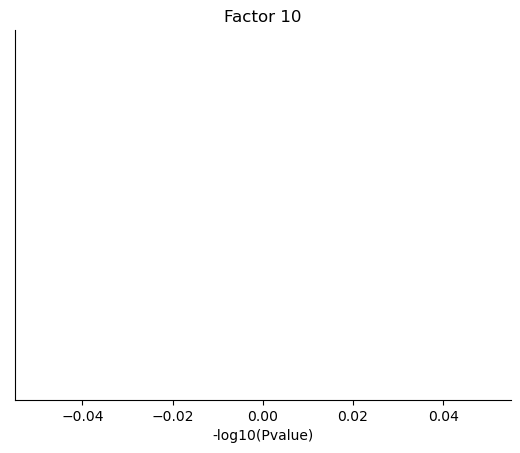

In [34]:
n_pathways = 15
#cmap = lambda c: plt.cm.GnBu_r(c /n_genes)
cmap = lambda c: plt.cm.OrRd_r(c /n_genes)

for factor in range(10):
#    ordr = np.argsort(phi_df.loc[topic, :].values)[::-1]
#    genes = phi_df.columns[ordr]
#    ord_phi_df = phi_df.iloc[:,ordr]
    plt.rcdefaults()
    fig, ax = plt.subplots()

    pathways = gp_list[factor]["name"].astype(str) + " (" + gp_list[factor]["native"].astype(str) + ")"
    top_pathways = pathways[0:n_pathways]
    y_pos = np.arange(len(top_pathways))
    neglogpval = - np.log10(gp_list[factor]['p_value'][0:n_pathways])
    bars =ax.barh(y_pos, neglogpval, align='center',edgecolor = "black")
    
    for k,b in enumerate(bars):
        b.set_color(cmap(k))
        b.set_edgecolor("black")

    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_pathways)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('-log10(Pvalue)')
    ax.set_title('Factor {}'.format(factor+1))
    clean_ax(ax)
#    plt.show()
    plt.savefig("/Users/juliafoyer/Documents/Skolarbete/Masters_thesis/Figures/SupFig1/B_TopPathways_factor{}.png".format(factor+1), bbox_inches='tight')

In [11]:
gp_list[6]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
6,GO:BP,GO:0006955,immune response,3.194545e-07,True,"""Any immune system process that functions in t...",2311,43,23,18117,0.534884,0.009952,query_1,"[GO:0002376, GO:0050896]"
7,GO:BP,GO:0002252,immune effector process,4.896236e-07,True,"""Any process of the immune system that can pot...",1309,43,18,18117,0.418605,0.013751,query_1,[GO:0002376]
8,GO:BP,GO:0002460,adaptive immune response based on somatic reco...,1.039773e-06,True,"""An immune response mediated by lymphocytes ex...",363,43,11,18117,0.255814,0.030303,query_1,[GO:0002250]
10,GO:BP,GO:0002376,immune system process,1.368839e-06,True,"""Any process involved in the development or fu...",3278,43,26,18117,0.604651,0.007932,query_1,[GO:0008150]
12,GO:BP,GO:0006959,humoral immune response,1.880519e-06,True,"""An immune response mediated through a body fl...",384,43,11,18117,0.255814,0.028646,query_1,[GO:0006955]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,GO:BP,GO:0019731,antibacterial humoral response,2.479092e-02,True,"""An immune response against bacteria mediated ...",62,43,4,18117,0.093023,0.064516,query_1,"[GO:0019730, GO:0042742]"
109,GO:BP,GO:0002920,regulation of humoral immune response,2.716701e-02,True,"""Any process that modulates the frequency, rat...",133,43,5,18117,0.116279,0.037594,query_1,"[GO:0006959, GO:0050776]"
110,GO:BP,GO:0016477,cell migration,2.814845e-02,True,"""The controlled self-propelled movement of a c...",1649,43,14,18117,0.325581,0.008490,query_1,[GO:0048870]
112,GO:BP,GO:0071310,cellular response to organic substance,4.670782e-02,True,"""Any process that results in a change in state...",2776,43,18,18117,0.418605,0.006484,query_1,"[GO:0010033, GO:0070887]"
